In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
series = pd.read_excel("D:\DATA SCIENCE\ASSIGNMENTS\Forecasting\CocaCola_Sales_Rawdata.xlsx")

In [3]:
series.head()

Quarter        Sales
0   Q1_86  1734.827000
1   Q2_86  2244.960999
2   Q3_86  2533.804993
3   Q4_86  2154.962997
4   Q1_87  1547.818996

In [4]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
series.describe()

Sales
count    42.000000
mean   2994.353308
std     977.930896
min    1547.818996
25%    2159.714247
50%    2782.376999
75%    3609.250000
max    5253.000000

In [6]:
series.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
#We will extract Quarter values and Year values separately from 'Quarter column'
series['Quarters']=0
series['Year']=0
for i in range(42):
    p=series["Quarter"][i]
    series['Quarters'][i]=p[0:2]
    series['Year'][i]=p[3:5]

C:\Users\ISHIKA\AppData\Local\Temp/ipykernel_15208/4086445688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['Quarters'][i]=p[0:2]
C:\Users\ISHIKA\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\ISHIKA\AppData\Local\Temp/ipykernel_15208/4086445688.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['Year'

In [8]:
series.head()

Quarter        Sales Quarters  Year
0   Q1_86  1734.827000       Q1    86
1   Q2_86  2244.960999       Q2    86
2   Q3_86  2533.804993       Q3    86
3   Q4_86  2154.962997       Q4    86
4   Q1_87  1547.818996       Q1    87

In [9]:
#Getting dummy variables for Q1,Q2,Q3,Q4
quarters_dummies = pd.DataFrame(pd.get_dummies(series['Quarters']))
series = pd.concat([series,quarters_dummies],axis=1)
series.head()

Quarter        Sales Quarters  Year  Q1  Q2  Q3  Q4
0   Q1_86  1734.827000       Q1    86   1   0   0   0
1   Q2_86  2244.960999       Q2    86   0   1   0   0
2   Q3_86  2533.804993       Q3    86   0   0   1   0
3   Q4_86  2154.962997       Q4    86   0   0   0   1
4   Q1_87  1547.818996       Q1    87   1   0   0   0

In [10]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     int64  
 4   Q1        42 non-null     uint8  
 5   Q2        42 non-null     uint8  
 6   Q3        42 non-null     uint8  
 7   Q4        42 non-null     uint8  
dtypes: float64(1), int64(1), object(2), uint8(4)
memory usage: 1.6+ KB


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

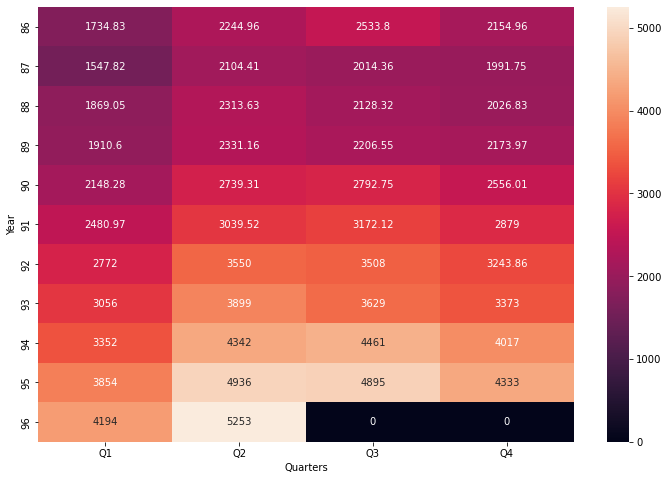

In [11]:
plt.figure(figsize=(12,8))
heatmap_y_year = pd.pivot_table(data=series,values="Sales",index="Year",columns="Quarters",fill_value=0)
sns.heatmap(heatmap_y_year,annot=True,fmt="g")

### Line Plot

<AxesSubplot:>

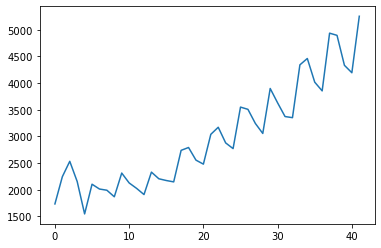

In [12]:
series.Sales.plot()

### Histogram Plot

<AxesSubplot:>

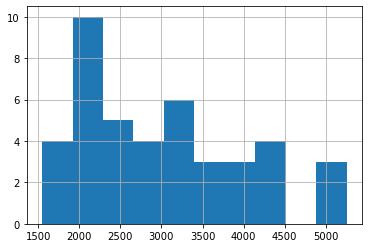

In [13]:
series.Sales.hist()

### Density Plot

<AxesSubplot:ylabel='Density'>

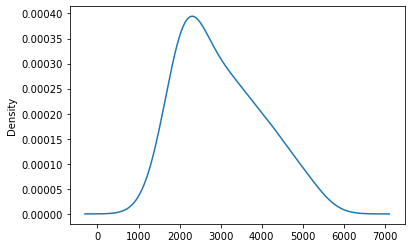

In [14]:
series.Sales.plot(kind='kde')

### Lag Plot

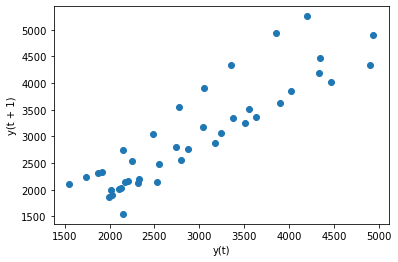

In [15]:
from pandas.plotting import lag_plot
lag_plot(series.Sales)
plt.show()

### ACF and PACF Plot

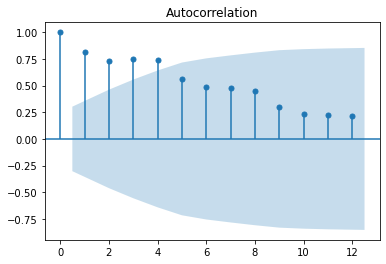

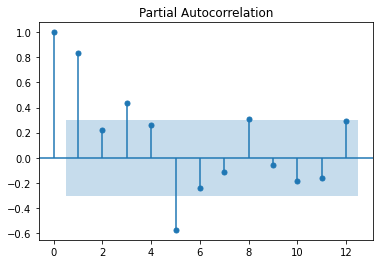

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(series.Sales,lags=12)
tsa_plots.plot_pacf(series.Sales,lags=12)
plt.show()

### Box Plot

<AxesSubplot:xlabel='Year', ylabel='Sales'>

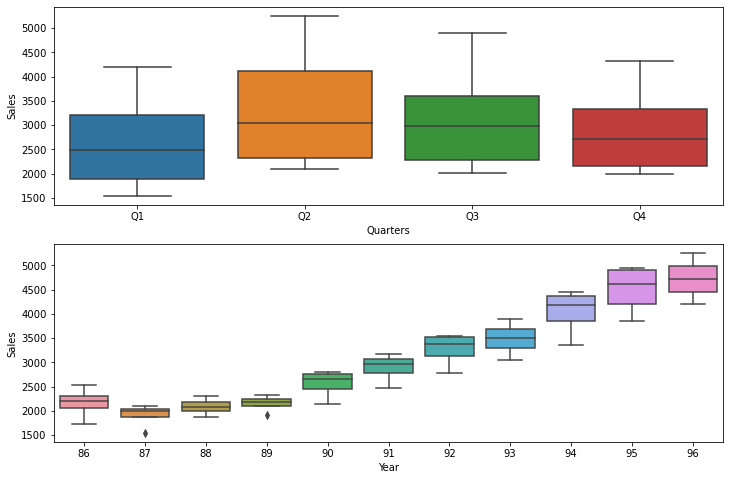

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=series)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=series)

## Model based Forecasting 

In [18]:
#Data Preprocessing for Models
series["t"] = np.arange(1,43)
series["t_squared"] = series["t"]*series["t"]
series["log_sales"] = np.log(series["Sales"])
series.head()

Quarter        Sales Quarters  Year  Q1  Q2  Q3  Q4  t  t_squared  log_sales
0   Q1_86  1734.827000       Q1    86   1   0   0   0  1          1   7.458663
1   Q2_86  2244.960999       Q2    86   0   1   0   0  2          4   7.716443
2   Q3_86  2533.804993       Q3    86   0   0   1   0  3          9   7.837477
3   Q4_86  2154.962997       Q4    86   0   0   0   1  4         16   7.675529
4   Q1_87  1547.818996       Q1    87   1   0   0   0  5         25   7.344602

<AxesSubplot:xlabel='Year', ylabel='Sales'>

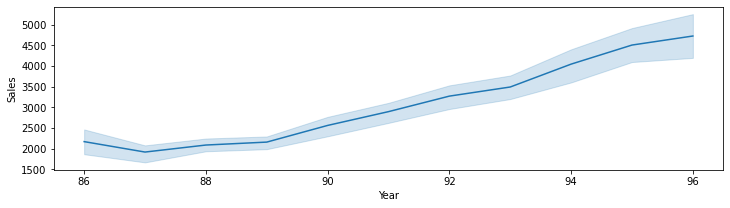

In [19]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=series)

## Moving Average 

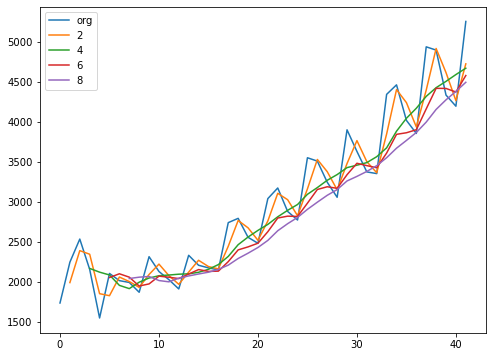

In [20]:
plt.figure(figsize=(8,6))
series.Sales.plot(label="org")
for i in range(2,10,2):
    series["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<AxesSubplot:>

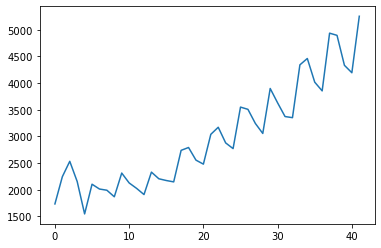

In [21]:
series.Sales.plot()

### Time Series Decomposition Plot

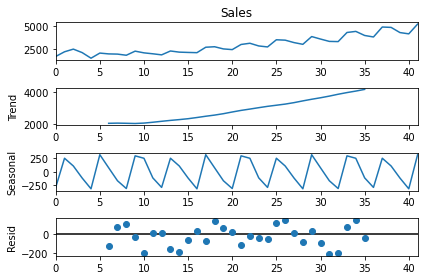

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(series.Sales,period=12)
decompose_ts_add.plot()
plt.show()

## Splitting data 

In [33]:
train = series.head(32)
test = series.tail(10)


In [23]:
#Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t', data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767121

In [24]:
#Exponential Model
Exp = smf.ols('log_sales~t', data=train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

590.3316432076657

In [25]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.7357355407437

In [26]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

In [27]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.351077112877

In [28]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.2503948361139

In [29]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

448.8678182691915

In [30]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

MODEL  RMSE_Values
4  rmse_add_sea_quad   277.351077
6  rmse_Mult_add_sea   448.867818
2          rmse_quad   457.735736
1           rmse_exp   590.331643
0        rmse_linear   752.923393
3       rmse_add_sea  1850.466546
5      rmse_Mult_sea  1908.250395

## Building final model with least RMSE value

In [32]:
series

Quarter        Sales Quarters  Year  Q1  Q2  Q3  Q4   t  t_squared  \
0    Q1_86  1734.827000       Q1    86   1   0   0   0   1          1   
1    Q2_86  2244.960999       Q2    86   0   1   0   0   2          4   
2    Q3_86  2533.804993       Q3    86   0   0   1   0   3          9   
3    Q4_86  2154.962997       Q4    86   0   0   0   1   4         16   
4    Q1_87  1547.818996       Q1    87   1   0   0   0   5         25   
5    Q2_87  2104.411995       Q2    87   0   1   0   0   6         36   
6    Q3_87  2014.362999       Q3    87   0   0   1   0   7         49   
7    Q4_87  1991.746998       Q4    87   0   0   0   1   8         64   
8    Q1_88  1869.049999       Q1    88   1   0   0   0   9         81   
9    Q2_88  2313.631996       Q2    88   0   1   0   0  10        100   
10   Q3_88  2128.320000       Q3    88   0   0   1   0  11        121   
11   Q4_88  2026.828999       Q4    88   0   0   0   1  12        144   
12   Q1_89  1910.603996       Q1    89   1   0   0   0  13        169   
13   Q2_89  2331.164993       Q2    89   0   1   0   0  14        196   
14   Q3_89  2206.549995       Q3    89   0   0   1   0  15        225   
15   Q4_89  2173.967995       Q4    89   0   0   0   1  16        256   
16   Q1_90  2148.278000       Q1    90   1   0   0   0  17        289   
17   Q2_90  2739.307999       Q2    90   0   1   0   0  18        324   
18   Q3_90  2792.753998       Q3    90   0   0   1   0  19        361   
19   Q4_90  2556.009995       Q4    90   0   0   0   1  20        400   
20   Q1_91  2480.973999       Q1    91   1   0   0   0  21        441   
21   Q2_91  3039.522995       Q2    91   0   1   0   0  22        484   
22   Q3_91  3172.115997       Q3    91   0   0   1   0  23        529   
23   Q4_91  2879.000999       Q4    91   0   0   0   1  24        576   
24   Q1_92  2772.000000       Q1    92   1   0   0   0  25        625   
25   Q2_92  3550.000000       Q2    92   0   1   0   0  26        676   
26   Q3_92  3508.000000       Q3    92   0   0   1   0  27        729   
27   Q4_92  3243.859993       Q4    92   0   0   0   1  28        784   
28   Q1_93  3056.000000       Q1    93   1   0   0   0  29        841   
29   Q2_93  3899.000000       Q2    93   0   1   0   0  30        900   
30   Q3_93  3629.000000       Q3    93   0   0   1   0  31        961   
31   Q4_93  3373.000000       Q4    93   0   0   0   1  32       1024   
32   Q1_94  3352.000000       Q1    94   1   0   0   0  33       1089   
33   Q2_94  4342.000000       Q2    94   0   1   0   0  34       1156   
34   Q3_94  4461.000000       Q3    94   0   0   1   0  35       1225   
35   Q4_94  4017.000000       Q4    94   0   0   0   1  36       1296   
36   Q1_95  3854.000000       Q1    95   1   0   0   0  37       1369   
37   Q2_95  4936.000000       Q2    95   0   1   0   0  38       1444   
38   Q3_95  4895.000000       Q3    95   0   0   1   0  39       1521   
39   Q4_95  4333.000000       Q4    95   0   0   0   1  40       1600   
40   Q1_96  4194.000000       Q1    96   1   0   0   0  41       1681   
41   Q2_96  5253.000000       Q2    96   0   1   0   0  42       1764   

    log_sales  
0    7.458663  
1    7.716443  
2    7.837477  
3    7.675529  
4    7.344602  
5    7.651791  
6    7.608058  
7    7.596767  
8    7.533186  
9    7.746574  
10   7.663088  
11   7.614228  
12   7.555175  
13   7.754123  
14   7.699185  
15   7.684309  
16   7.672422  
17   7.915461  
18   7.934783  
19   7.846203  
20   7.816407  
21   8.019456  
22   8.062154  
23   7.965199  
24   7.927324  
25   8.174703  
26   8.162801  
27   8.084519  
28   8.024862  
29   8.268475  
30   8.196712  
31   8.123558  
32   8.117312  
33   8.376090  
34   8.403128  
35   8.298291  
36   8.256867  
37   8.504311  
38   8.495970  
39   8.374015  
40   8.341410  
41   8.566555

In [34]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=series).fit()

In [35]:
pred_new = pd.Series(add_sea_Quad.predict(series))
pred_new

0     1734.907886
1     2262.621873
2     2172.893111
3     1914.609724
4     1727.564748
5     2272.447917
6     2199.888337
7     1958.774132
8     1788.898338
9     2350.950688
10    2295.560291
11    2071.615267
12    1918.908656
13    2498.130188
14    2459.908973
15    2253.133131
16    2117.595702
17    2713.986416
18    2692.934383
19    2503.327723
20    2384.959476
21    2998.519372
22    2994.636520
23    2822.199043
24    2720.999977
25    3351.729056
26    3365.015386
27    3209.747090
28    3125.717207
29    3773.615467
30    3804.070980
31    3665.971866
32    3599.111165
33    4264.178607
34    4311.803302
35    4190.873370
36    4141.181850
37    4823.418475
38    4888.212351
39    4784.451601
40    4751.929264
41    5451.335070
dtype: float64

In [36]:
predict_data["forecasted_sales"] = pd.Series(pred_new)

C:\Users\ISHIKA\AppData\Local\Temp/ipykernel_15208/3650563384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["forecasted_sales"] = pd.Series(pred_new)


In [37]:
predict_data

Quarter   Sales Quarters  Year  Q1  Q2  Q3  Q4   t  t_squared  log_sales  \
32   Q1_94  3352.0       Q1    94   1   0   0   0  33       1089   8.117312   
33   Q2_94  4342.0       Q2    94   0   1   0   0  34       1156   8.376090   
34   Q3_94  4461.0       Q3    94   0   0   1   0  35       1225   8.403128   
35   Q4_94  4017.0       Q4    94   0   0   0   1  36       1296   8.298291   
36   Q1_95  3854.0       Q1    95   1   0   0   0  37       1369   8.256867   
37   Q2_95  4936.0       Q2    95   0   1   0   0  38       1444   8.504311   
38   Q3_95  4895.0       Q3    95   0   0   1   0  39       1521   8.495970   
39   Q4_95  4333.0       Q4    95   0   0   0   1  40       1600   8.374015   
40   Q1_96  4194.0       Q1    96   1   0   0   0  41       1681   8.341410   
41   Q2_96  5253.0       Q2    96   0   1   0   0  42       1764   8.566555   

    forecasted_sales  
32       3599.111165  
33       4264.178607  
34       4311.803302  
35       4190.873370  
36       4141.181850  
37       4823.418475  
38       4888.212351  
39       4784.451601  
40       4751.929264  
41       5451.335070